In [1]:
"""
# CLASS: CPSC 483

# ASSIGNMENT 3

# GROUP PARTICIPANTS: ABHISHEK MHATRE,
                      ANKITA JAISWAL,
                      MELIKA AMINI
"""

'\n# CLASS: CPSC 483\n\n# ASSIGNMENT 3\n\n# GROUP PARTICIPANTS: ABHISHEK MHATRE,\n                      ANKITA JAISWAL,\n                      MELIKA AMINI\n'

In [2]:
""" Import Libraries """

import numpy as np
import pandas
from sklearn.preprocessing import scale,label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [3]:
""" Data Preprocessing """
# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pandas.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pandas.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values


In [4]:
""" Function to print differnt evaluations of a model """
def evaluate_model(classifier,test_samples,test_targets, predictions, is_roc=False):

    # Score
    score_ = classifier.score(test_samples, test_targets)
    print('Score: ', score_, '\n')

    # Confusion Matrix
    conf_matrix_ = confusion_matrix(test_targets,predictions)
    print('Confusion Matrix:\n', conf_matrix_ , '\n')
    
    # Only print ROC and AUC if needed
    if is_roc:
        # ROC Curve
        false_positive_rate = dict()
        true_positive_rate = dict()
        roc_auc = dict()

        for i in range(n_classes):
            false_positive_rate[i], true_positive_rate[i], _ = roc_curve(
                test_targets[:,i], 
                predictions[:,i])
            roc_auc[i] = auc(
                false_positive_rate[i],
                    true_positive_rate[i])

        # Plotting the ROC Curve
        plt.figure()
        lw = 2

        plt.plot(false_positive_rate[0],
                 true_positive_rate[0],
                 color='darkorange',
                 lw=lw,
                 label='ROC curve (area =%0.2f)' % roc_auc[0])
        plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('Gaussian ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

    
        # AUC Score
        roc_auc_score_ = roc_auc_score(test_targets, predictions)
        print('Area Under the Curve (AUC): ',roc_auc_score_)

In [5]:
bank.shape

(4521, 33)

In [6]:
bank.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.0,0.121072,0.0,0.0,0.374052,1.611873,-0.711861,-0.576829,-0.407218,...,1,0,0,0,0,0,0,0,0,1
1,-0.772583,0.0,1.118644,1.0,1.0,-0.596026,-0.490631,-0.169194,-0.576829,2.989044,...,1,0,1,0,0,0,0,0,0,0
2,-0.583458,0.0,-0.024144,1.0,0.0,0.010273,-0.911131,-0.303898,-0.576829,2.899143,...,0,1,0,1,0,0,0,0,0,0
3,-1.056270,0.0,0.017726,1.0,1.0,-1.566105,-0.070130,-0.250017,0.387967,-0.407218,...,1,0,0,1,0,0,1,0,0,1
4,1.686036,0.0,-0.472753,1.0,0.0,-1.323585,-0.490631,-0.146102,-0.576829,-0.407218,...,1,0,1,0,0,0,1,0,0,1


In [7]:
# Binarize targets

t = label_binarize(t, classes=[0,1])
n_classes = t.shape[1]

### Q1 Use sklearn.model_selection.train_test_split to set aside 20% of the data as a test set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split train and test data into input features and t
train_input_features,test_input_features,train_targets,test_targets=\
train_test_split(X,t,
                 test_size=0.2,
                 random_state=0)

In [10]:
print('Train Input Features Shape: ',train_input_features.shape)
print('Train targets shape: ',train_targets.shape)

Train Input Features Shape:  (3616, 32)
Train targets shape:  (3616, 1)


In [11]:
print('Test Input Features Shape: ',test_input_features.shape)
print('Test targets shape: ',test_targets.shape)

Test Input Features Shape:  (905, 32)
Test targets shape:  (905, 1)


### Q2 Fit an sklearn.naive_bayes.GaussianNB classifier to your training set.

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
# Create a gaussian classifier
gaussian_classifier = GaussianNB()

# Fit intput features and targets using Gauassian Classifier
gaussian_classifier.fit(train_input_features,train_targets)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

### Q3 Use the classifier to predict the targets in the test set.

Gaussian NB classifier model Evaluations:

Score:  0.817679558011 

Confusion Matrix:
 [[681 112]
 [ 53  59]] 



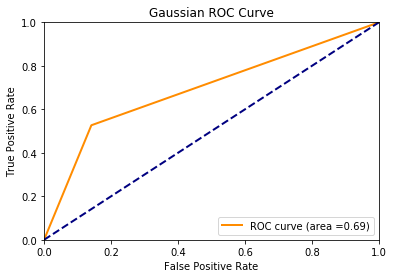

Area Under the Curve (AUC):  0.692774950459


In [14]:
# Predict using Gaussian classifier
gaussian_predictions = gaussian_classifier.predict(test_input_features)

# Reshaping guassian predictions outcome
gaussian_predictions =gaussian_predictions.reshape(-1,1)

print('Gaussian NB classifier model Evaluations:\n')
evaluate_model(gaussian_classifier,test_input_features,test_targets, gaussian_predictions, is_roc=True)

### Q4 Fit an sklearn.linear_model.LogisticRegression model to your training set, setting fit_intercept to False since the dataset is normalized.

In [15]:
# Import
from sklearn.linear_model import LogisticRegression

In [16]:
# Create logistic regression classifier object
logistic_regressor = LogisticRegression(random_state=0,
                                       fit_intercept=False,)

# Fit input features and targets into logistic regression classifier
logistic_regressor.fit(train_input_features,train_targets)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Logistic Regression model Evaluations:

Score:  0.895027624309 

Confusion Matrix:
 [[768  25]
 [ 70  42]] 



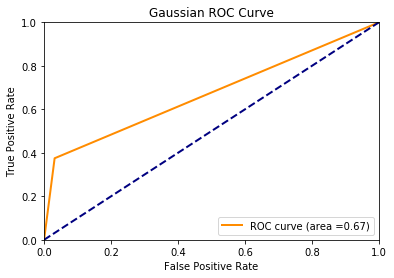

Area Under the Curve (AUC):  0.671737074401


In [17]:
# Predict using logistic regression classifier
logistic_regressor_predictions = logistic_regressor.predict(test_input_features)

print('Logistic Regression model Evaluations:\n')
evaluate_model(logistic_regressor,
               test_input_features,
               test_targets,
               logistic_regressor_predictions.reshape(-1,1),
              is_roc=True)

### Q5 Fit sklearn.svm.SVC models

In [18]:
# Import
from sklearn.svm import SVC

#### [A] 'linear' model

In [19]:
#fit data using linear kernel function
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(train_input_features, train_targets)

# predict
predict_SVC_linear = svc_linear.predict(test_input_features)

evaluate_model(svc_linear, test_input_features, test_targets, predict_SVC_linear, is_roc=False)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.889502762431 

Confusion Matrix:
 [[788   5]
 [ 95  17]] 



#### [B] 'poly' model

In [20]:
#fit data using poly kernel function
svc_poly = SVC(kernel = 'poly')
svc_poly.fit(train_input_features, train_targets)

# predict
predict_SVC_poly = svc_poly.predict(test_input_features)

evaluate_model(svc_poly, test_input_features, test_targets, predict_SVC_poly, is_roc=False)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score:  0.872928176796 

Confusion Matrix:
 [[786   7]
 [108   4]] 



#### [C] 'rbf' model

In [21]:
#fit data using rbf kernel function
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(train_input_features, train_targets)

# predict
predict_SVC_rbf = svc_rbf.predict(test_input_features)

evaluate_model(svc_rbf, test_input_features, test_targets, predict_SVC_rbf, is_roc=False)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score:  0.880662983425 

Confusion Matrix:
 [[781  12]
 [ 96  16]] 



#### [D] 'sigmoid' model

In [22]:
#fit data using sigmoid kernel function
svc_sigmoid = SVC(kernel = 'sigmoid')
svc_sigmoid.fit(train_input_features, train_targets)

# predict
predict_SVC_sigmoid = svc_sigmoid.predict(test_input_features)

evaluate_model(svc_sigmoid, test_input_features, test_targets, predict_SVC_sigmoid, is_roc=False)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score:  0.869613259669 

Confusion Matrix:
 [[759  34]
 [ 84  28]] 



### Q6 Of the classifiers you fit in experiments (2) through (5), which has the best performance?

The classifier with the best performance is SVC model using Linear kernel function with 0.8895027624309392 accuracy as compare to the Gaussian Naive bayes with 0.8176795580110497 accuracy score. 

### Q7 The best-performing classifier you found in experiment (6) seems to be doing pretty well, but let’s check our assumptions. How many examples in the training set had a target value of 0? How many had a target value of 1? What would our accuracy be if we simply predicted 0, regardless of the input? What would the AUC score be?


There are 3207 examples that have the target value 0 and 409 example have target value of 1. 
If we just predicted 0 regardless of the input then, the accuracy would be 87%
The AUC score would be 0.5 

### Q8 Extra credit: One of the easiest ways to deal with an unbalanced dataset is random oversampling. Augment your dataset until there are equal numbers of positive and negative examples, then re-fit the classifiers in experiments (2) through (5). 

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X,t)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
X_resampled.shape, y_resampled.shape

((8000, 32), (8000,))

In [25]:
# Binarize the output
from sklearn.preprocessing import label_binarize
y_resampled = label_binarize(y_resampled, classes=[0,1])
n_classes = y_resampled.shape[1]

In [26]:
# Split train and test data into input features and t
train_input_features_new,test_input_features_new, train_targets_new,  test_targets_new = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=0)

Gaussian NB classifier model Evaluations:

Score:  0.703125 

Confusion Matrix:
 [[662 140]
 [335 463]] 



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


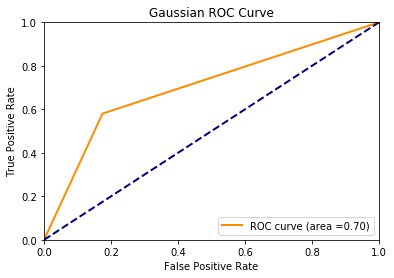

Area Under the Curve (AUC):  0.702818455115


In [27]:
""" Gaussian Classifier """

# Create a gaussian classifier
gaussian_classifier = GaussianNB()

# Fit intput features and targets using Gauassian Classifier
gaussian_classifier.fit(train_input_features_new,train_targets_new)

# Predict using Gaussian classifier
gaussian_predictions = gaussian_classifier.predict(test_input_features_new)

# Reshaping guassian predictions outcome
gaussian_predictions =gaussian_predictions.reshape(-1,1)

print('Gaussian NB classifier model Evaluations:\n')
evaluate_model(gaussian_classifier,test_input_features_new,test_targets_new, gaussian_predictions, is_roc=True)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression model Evaluations:

Score:  0.801875 

Confusion Matrix:
 [[672 130]
 [187 611]] 



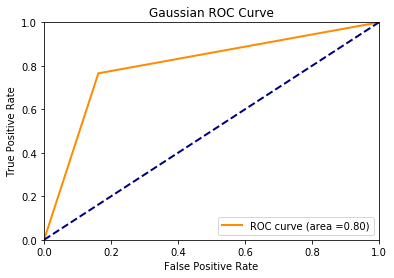

Area Under the Curve (AUC):  0.801784698654


In [28]:
""" Logistic Reggression """

# Create logistic regression classifier object
logistic_regressor = LogisticRegression(random_state=0,
                                       fit_intercept=False,)

# Fit input features and targets into logistic regression classifier
logistic_regressor.fit(train_input_features_new,train_targets_new)

# Predict using logistic regression classifier
logistic_regressor_predictions = logistic_regressor.predict(test_input_features_new)

print('Logistic Regression model Evaluations:\n')
evaluate_model(logistic_regressor,
               test_input_features_new,
               test_targets_new,
               logistic_regressor_predictions.reshape(-1,1),
              is_roc=True)

In [29]:
""" SVC """

#### [A] 'linear' model

#fit data using linear kernel function
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(train_input_features_new, train_targets_new)

# predict
predict_SVC_linear = svc_linear.predict(test_input_features_new)
print('SV model with \'linear\' kernal:\n')
evaluate_model(svc_linear, test_input_features_new, test_targets_new, predict_SVC_linear, is_roc=False)



#### [B] 'poly' model

#fit data using poly kernel function
svc_poly = SVC(kernel = 'poly')
svc_poly.fit(train_input_features_new, train_targets_new)

# predict
predict_SVC_poly = svc_poly.predict(test_input_features_new)
print('SV model with \'poly\' kernal:\n')
evaluate_model(svc_poly, test_input_features_new, test_targets_new, predict_SVC_poly, is_roc=False)



#### [C] 'rbf' model

#fit data using rbf kernel function
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(train_input_features_new, train_targets_new)

# predict
predict_SVC_rbf = svc_rbf.predict(test_input_features_new)
print('SV model with \'rbf\' kernal:\n')
evaluate_model(svc_rbf, test_input_features_new, test_targets_new, predict_SVC_rbf, is_roc=False)



#### [D] 'sigmoid' model

#fit data using sigmoid kernel function
svc_sigmoid = SVC(kernel = 'sigmoid')
svc_sigmoid.fit(train_input_features_new, train_targets_new)

# predict
predict_SVC_sigmoid = svc_sigmoid.predict(test_input_features_new)
print('SV model with \'sigmoid\' kernal:\n')
evaluate_model(svc_sigmoid, test_input_features_new, test_targets_new, predict_SVC_sigmoid, is_roc=False)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SV model with 'linear' kernal:

Score:  0.793125 

Confusion Matrix:
 [[660 142]
 [189 609]] 



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SV model with 'poly' kernal:

Score:  0.815625 

Confusion Matrix:
 [[699 103]
 [192 606]] 



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SV model with 'rbf' kernal:

Score:  0.84 

Confusion Matrix:
 [[669 133]
 [123 675]] 



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SV model with 'sigmoid' kernal:

Score:  0.74 

Confusion Matrix:
 [[609 193]
 [223 575]] 



#### Do the metrics improve?

> No, the metrics did not improve in any of the models. 